In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
ruou = pd.read_csv("winequality-red.csv")

- Tìm hiểu dữ liệu

In [12]:
ruou.head() #Xem 5 dòng đầu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
ruou.describe() #Thống kê mô tả
ruou.isnull().sum() #Kiểm tra giá trị thiếu

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Trực quan hóa dữ liệu

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16880\1187059118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=ruou, palette='Set2')


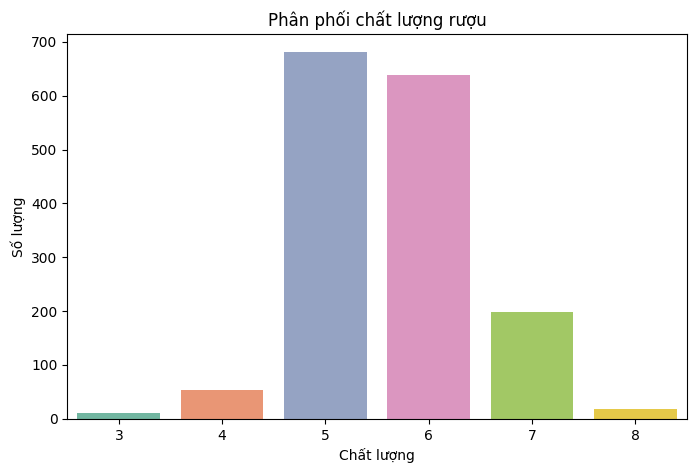

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=ruou, palette='Set2')
plt.title('Phân phối chất lượng rượu')
plt.xlabel('Chất lượng')
plt.ylabel('Số lượng')
plt.show()

Mục đích:
Xem rượu được đánh giá chất lượng như thế nào, chất lượng nào phổ biến nhất.

Phân tích:
Nếu chất lượng tập trung ở mức 5, 6, 7 thì đa số rượu ở mức trung bình khá. Nếu lệch trái/phải, có thể dữ liệu không cân bằng.

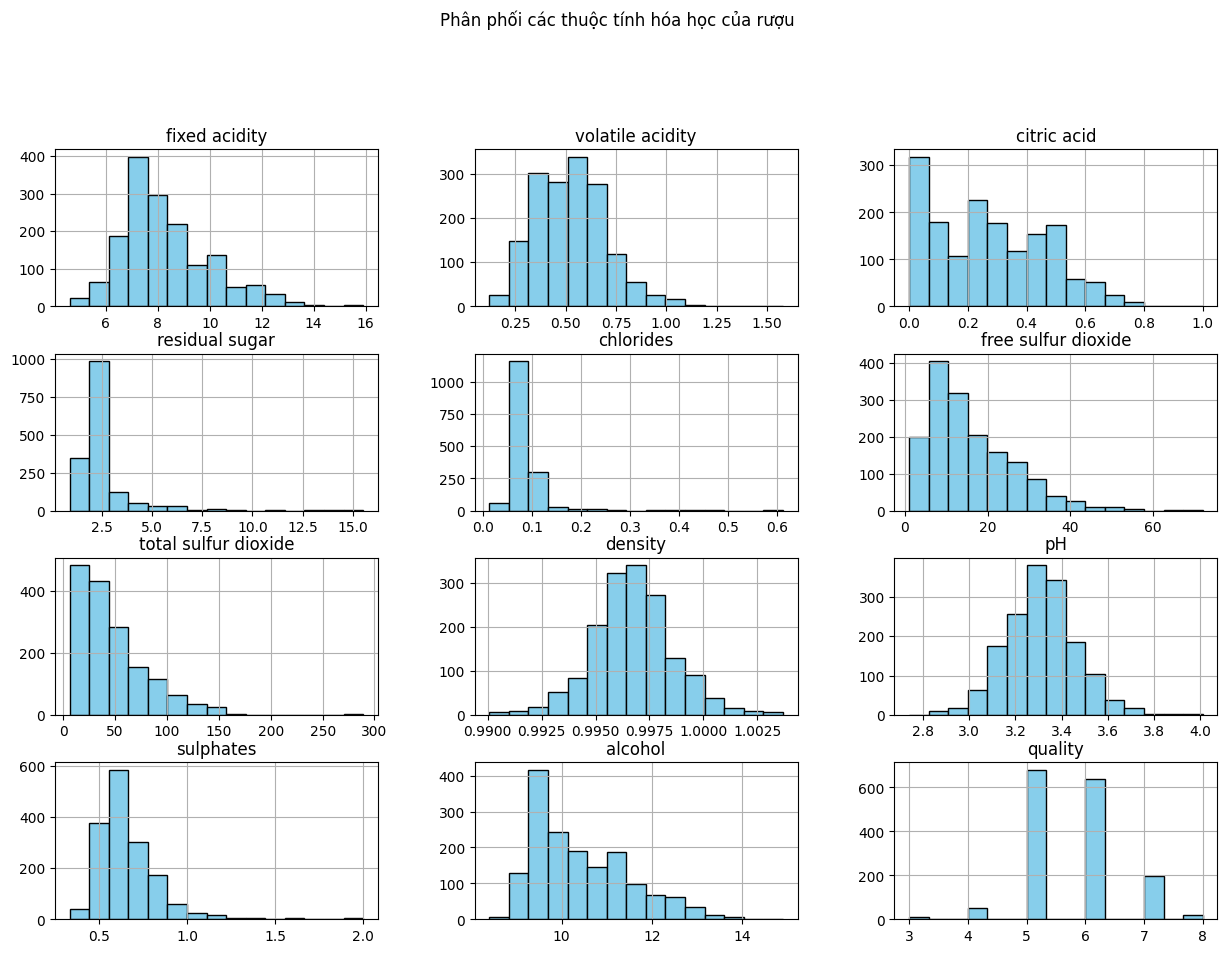

In [15]:
ruou.hist(bins=15, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle('Phân phối các thuộc tính hóa học của rượu', y=1.02)
plt.show()

Mục đích:
Quan sát phân phối từng thuộc tính (ví dụ: độ chua, lượng đường, độ cồn...).

Phân tích:

- Nếu histogram lệch phải/trái, thuộc tính đó không phân phối chuẩn.
- Nếu có nhiều giá trị ngoại lai (outlier), cần chú ý.

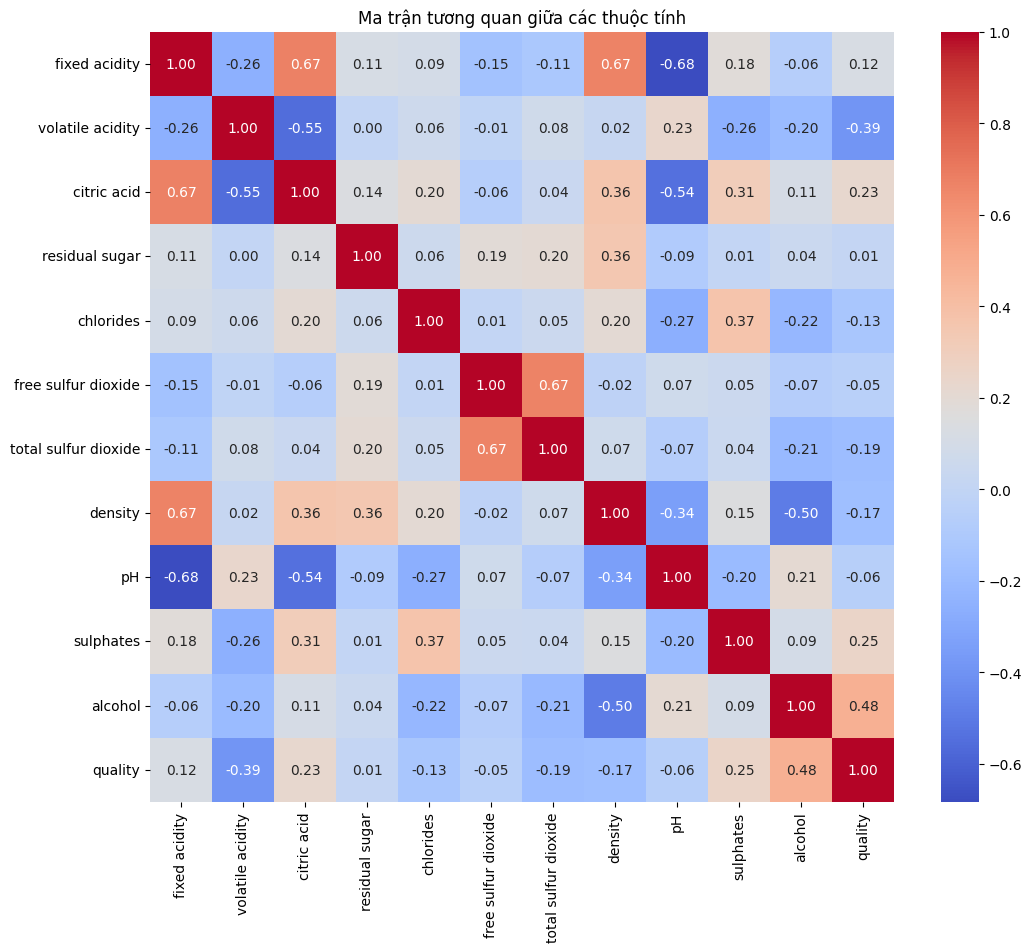

In [16]:
#Ma trận tương quan (heatmap)
plt.figure(figsize=(12,10))
corr = ruou.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

Mục đích:
Tìm mối liên hệ giữa các thuộc tính, đặc biệt là với quality.

Phân tích:

- Các giá trị gần 1 hoặc -1 là tương quan mạnh.
- Nếu alcohol và quality có tương quan dương, rượu nồng độ cồn cao thường chất lượng cao hơn.
- Nếu volatile acidity và quality có tương quan âm, độ axit bay hơi cao thì chất lượng thấp.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16880\493917206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=ruou, palette='Set3')


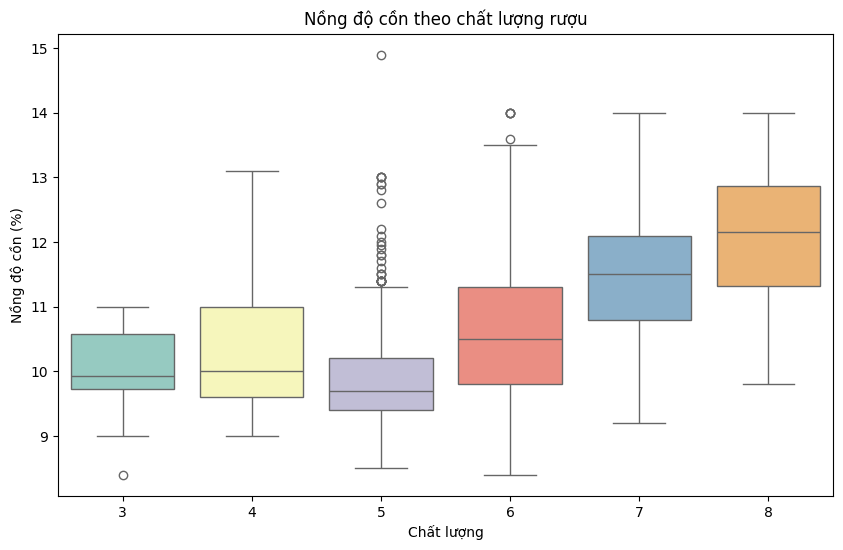

In [17]:
#Boxplot: So sánh thuộc tính theo chất lượng
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=ruou, palette='Set3')
plt.title('Nồng độ cồn theo chất lượng rượu')
plt.xlabel('Chất lượng')
plt.ylabel('Nồng độ cồn (%)')
plt.show()

Mục đích:

Biểu đồ boxplot (hộp) giúp bạn so sánh phân phối của một biến số (ở đây là nồng độ cồn) theo từng nhóm (ở đây là các mức chất lượng rượu).

Phân tích:
Nếu boxplot của chất lượng cao nằm cao hơn, rượu ngon thường có nồng độ cồn cao.

Ý nghĩa từng phần của boxplot:

- Đường giữa hộp (median): Giá trị trung vị của nồng độ cồn cho mỗi mức chất lượng.
- Cạnh dưới và trên của hộp (Q1, Q3): 25% và 75% dữ liệu nằm dưới/ trên các giá trị này.
- Râu (whiskers): Thể hiện phạm vi dữ liệu không phải ngoại lai (thường là 1.5 lần khoảng tứ phân vị).
- Dấu chấm ngoài hộp: Các giá trị ngoại lai (outlier).

Phân tích cụ thể:

- So sánh vị trí hộp: Nếu hộp của chất lượng cao (7, 8) nằm cao hơn hộp của chất lượng thấp (3, 4, 5), chứng tỏ rượu chất lượng cao thường có nồng độ cồn cao hơn.
Độ rộng hộp: Nếu hộp rộng, nồng độ cồn ở mức chất lượng đó biến động lớn. Nếu hộp hẹp, nồng độ cồn ổn định hơn.
- Số lượng outlier: Nếu có nhiều dấu chấm ngoài hộp ở một mức chất lượng, mức đó có nhiều rượu đặc biệt về nồng độ cồn.
- So sánh median: Median càng cao ở mức chất lượng cao, càng khẳng định xu hướng rượu ngon có nồng độ cồn cao.

Kết luận từ dữ liệu rượu vang đỏ:

- Rượu chất lượng cao (7, 8) thường có median nồng độ cồn cao hơn các mức thấp.
- Độ biến động nồng độ cồn ở các mức chất lượng trung bình (5, 6) lớn hơn, cho thấy nhóm này đa dạng về đặc tính.
- Có một số rượu chất lượng thấp nhưng nồng độ cồn cao (outlier), có thể là ngoại lệ hoặc do yếu tố khác ngoài nồng độ cồn ảnh hưởng đến chất lượng.

Ứng dụng thực tế:
Nếu muốn sản xuất rượu chất lượng cao, nên chú ý kiểm soát và nâng cao nồng độ cồn, nhưng cũng cần cân nhắc các yếu tố khác như axit, sulphates, v.v.




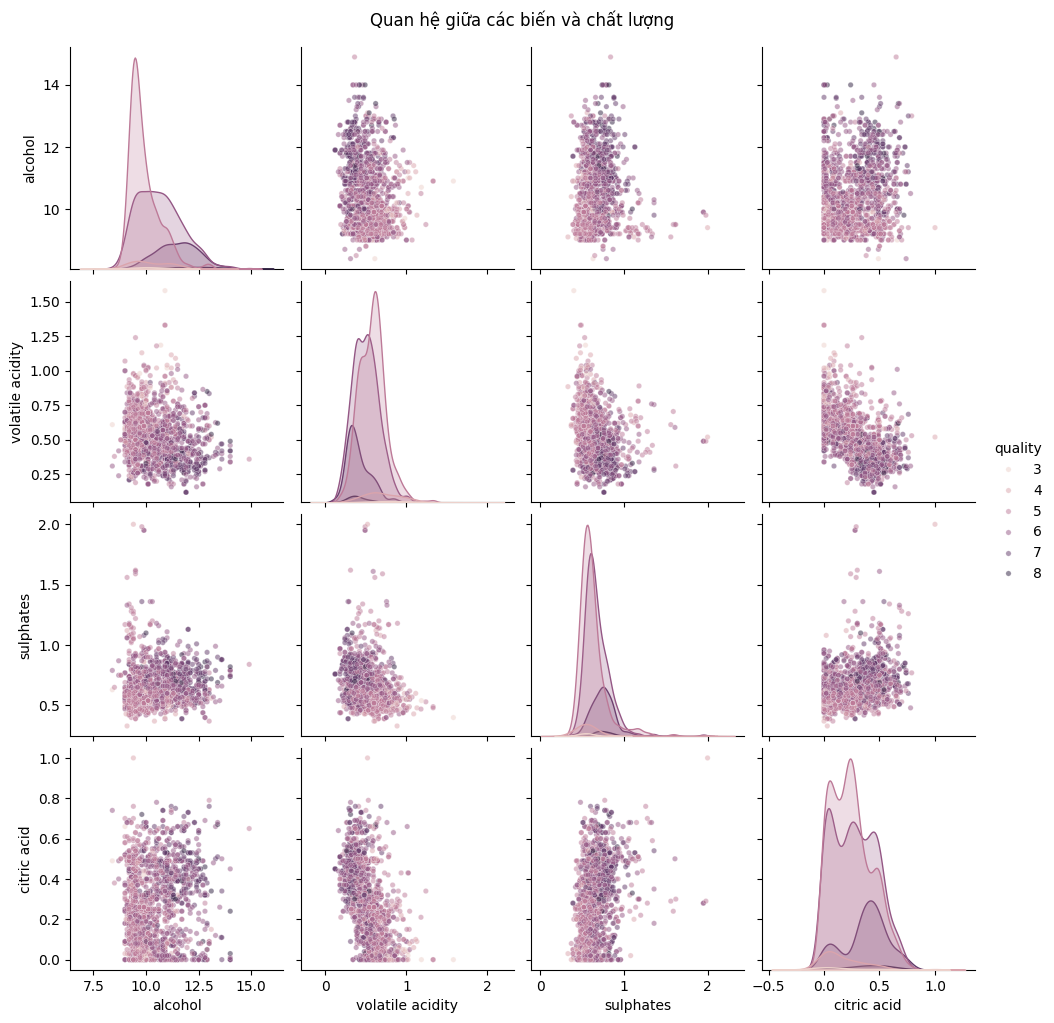

In [18]:
#Pairplot: Quan hệ giữa các biến và chất lượng
sns.pairplot(ruou[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']], hue='quality', diag_kind='kde', plot_kws={'alpha':0.5, 's':15})
plt.suptitle('Quan hệ giữa các biến và chất lượng', y=1.02)
plt.show()

Mục đích:
Nhìn tổng thể các mối quan hệ giữa các biến quan trọng và chất lượng.

Phân tích:

- Các scatter plot cho thấy biến nào liên quan chặt với chất lượng.
- Đường chéo cho biết phân phối từng biến.


## Phán đoán 
- Rượu có nồng độ cồn cao, axit bay hơi thấp, sulphates cao thường có chất lượng tốt hơn.
- Các thuộc tính như residual sugar, chlorides ít ảnh hưởng đến chất lượng.
- Dữ liệu không cân bằng về chất lượng, chủ yếu tập trung ở mức trung bình.
- Có thể xây dựng mô hình dự báo chất lượng dựa trên các thuộc tính hóa học, ưu tiên các biến có tương quan mạnh với quality.